In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV, Lasso, Ridge, RidgeClassifier, SGDClassifier, SGDRegressor, 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, precision_recall_fscore_support, f1_score, r2_score 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint, gamma as sp_gamma, expon as sp_expon, uniform as sp_uniform
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
import cPickle as pickle

In [15]:
def open_prepper(file_path):
    """Open the DataPrepper from pickled file."""
    with open(file_path) as f:
        prepper = pickle.load(f)
    return prepper

file_path = '../data/store/data_prepper_ALL-CATEGORIES.pkl'
prepper = open_prepper(file_path)

X_train, y_train = prepper.return_training_data()
X_test, y_test = prepper.return_testing_data()

In [16]:
y_train['log_image_views'] = y_train['image_views'].apply(lambda x: np.log(x))
y_train['log_image_views'] = y_train['log_image_views'].apply(lambda x: 0 if x < 0 else x)

y_test['log_image_views'] = y_test['image_views'].apply(lambda x: np.log(x))
y_test['log_image_views'] = y_test['log_image_views'].apply(lambda x: 0 if x < 0 else x)

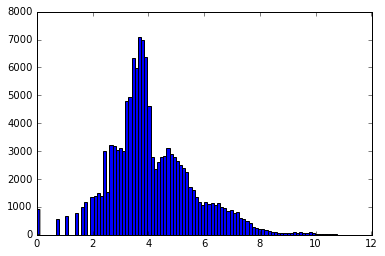

In [17]:
#plt.hist(y_train['image_views'], bins=100)
plt.hist(y_train['log_image_views'], bins=100)
plt.show()

In [18]:
y_train.head()

,,user_is_pro,user_can_buy_pro,user_total_views,image_ncomments,image_nfavs,image_nsets,image_npools,image_views,image_views_quantized,user_total_views_quantized,image_nfavs_quantized,image_ncomments_quantized,image_nsets_quantized,image_npools_quantized,log_image_views
owner,id,,,,,,,,,,,,,,,
27672924@N03,3311374123,0.0,0.0,7856.0,0,0.0,1,0,244.0,5,3,1,1,1,1,5.497168
12385792@N00,8417362317,1.0,0.0,7760.0,0,0.0,1,0,4.0,1,3,1,1,1,1,1.386294
69757796@N06,7945136488,0.0,0.0,151.0,0,0.0,1,0,33.0,2,1,1,1,1,1,3.496508
127624742@N06,15482629838,0.0,0.0,467.0,0,0.0,1,0,12.0,1,1,1,1,1,1,2.484907
71786611@N06,8380502711,0.0,0.0,805.0,0,0.0,1,5,50.0,3,1,1,1,1,5,3.912023


### RANDOM FOREST REGRESSION

In [32]:
model_RF_regression = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=None, min_samples_split=2,
                                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                                            max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=30,
                                            random_state=None, verbose=2, warm_start=False)

In [33]:
model_RF_regression.fit(X_train, y_train['log_image_views'])

building tree 2 of 500
building tree 1 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
 building tree 14 of 500building tree 13 of 500

building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 29 of 500
building tree 28 of 500
 building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500

[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed: 16.6min


building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500


[Parallel(n_jobs=30)]: Done 305 tasks      | elapsed: 45.0min


building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500


[Parallel(n_jobs=30)]: Done 500 out of 500 | elapsed: 73.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=30, oob_score=False, random_state=None,
           verbose=2, warm_start=False)

In [34]:
model_RF_regression.score(X_test, y_test['log_image_views'])

[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    0.6s
[Parallel(n_jobs=30)]: Done 305 tasks      | elapsed:    3.2s
[Parallel(n_jobs=30)]: Done 500 out of 500 | elapsed:    5.1s finished


0.54372882531004341

Was 0.53 with 100 trees

### GBR

In [29]:
model_GB_regression = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                max_depth=3, init=None, random_state=None, max_features=None, alpha=0.9,
                                                verbose=2, max_leaf_nodes=None, warm_start=False, presort='auto')

In [30]:
model_GB_regression.fit(X_train, y_train['log_image_views'])

      Iter       Train Loss   Remaining Time 
         1           2.1688           25.22m
         2           2.0987           24.81m
         3           2.0384           24.55m
         4           1.9893           24.23m
         5           1.9467           23.97m
         6           1.9119           23.72m
         7           1.8810           23.43m
         8           1.8556           23.18m
         9           1.8319           22.91m
        10           1.8133           22.66m
        11           1.7944           22.24m
        12           1.7791           21.95m
        13           1.7641           21.72m
        14           1.7507           21.35m
        15           1.7395           21.07m
        16           1.7280           20.78m
        17           1.7187           20.52m
        18           1.7056           20.28m
        19           1.6979           20.02m
        20           1.6886           19.70m
        21           1.6797           19.45m
        2

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=2,
             warm_start=False)

In [31]:
model_GB_regression.score(X_test, y_test['log_image_views'])

0.34180395748462966

### ADABOOST

In [35]:
model_ada_regression = AdaBoostRegressor(base_estimator=None, n_estimators=100, learning_rate=1.0,
                                         loss='linear', random_state=None

SyntaxError: invalid syntax (<ipython-input-35-ae9328ad41b1>, line 2)

In [ ]:
model_ada_regression.fit(X_train, y_train['log_image_views'])

In [ ]:
model_ada_regression.score(X_test, y_test['log_image_views'])

### SGD REGRESSSION

In [ ]:
model_sgd_regression = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True,
                                    n_iter=5, shuffle=True, verbose=0, epsilon=0.1, random_state=None,
                                    learning_rate='invscaling', eta0=0.01, power_t=0.25, warm_start=False, average=False)